# Car Price Prediction Using K Nearest Neighbors

## Introduction
In this project we are going to be working on a dataset from the <a href = 'https://archive.ics.uci.edu/ml/datasets/automobile'>UCI Machine Learning Repository</a> to make predictions on car prices.
The dataset contains the following columns:

1. `symboling`: -3, -2, -1, 0, 1, 2, 3.
2. `normalized-losses`: continuous from 65 to 256.
3. `make`: this includes car brands such as alfa-romero, audi, bmw, chevrolet, dodge, honda etc.
4. `fuel-type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num-of-doors`: four, two.
7. `body-style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.

Our goal is to demonstrate a proper machine learning work flow by computing the RMSE(Root Mean Squared Error) values of our predictions using different individual features, multiple features and different hyperparameter values. For this project the machine learning model we will be working with is <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html'>scikit-learn.neighbors KNeighborRegressor</a> and the error metric we will be using is <a href = 'https://scikit-learn.org/0.18/modules/generated/sklearn.metrics.mean_squared_error.html'>scikit-learn.metrics mean_squared_error</a>. We will also be using <a href = 'https://scikit-learn.org/stable/modules/cross_validation.html'>scikit-learn cross-validation</a> to perform a cross validation on our dataset and <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html'>scikit-learn KFold</a> class to split and randomize our dataset.


## Data Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')
%matplotlib inline

In [2]:
cars = pd.read_csv('imports-85.data')
pd.set_option('display.max_columns', 50)
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The data we read in did not have the expected column names. We are going to replace the columns with the actual names of the columns.

In [3]:
cars.columns = ['symboling', 'normalized_losses', 'make',
                'fuel_type', 'aspiration', 'num_of_doors',
                'body_style', 'drive_wheels', 'engine_location',
                'wheel_base', 'length', 'width', 'height', 
                'curb_weight', 'engine_type', 'num_of_cylinders', 
                'engine_size', 'fuel_system', 'bore', 'stroke', 
                'compression_ratio', 'horsepower', 'peak_rpm', 
                'city_mpg', 'highway_mpg', 'price'
               ]

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_of_doors       204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   204 non-null    object 
 16  engine_size        204 non

# Data Cleaning

Despite it showing that there are no null columns, we could see that some of the columns had a value of `'?'` which is infact a null value. We are going to replace this value with `numpy.nan` float value.

In [5]:
cars =  cars.replace('?', np.nan)

cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
cars.isnull().sum()

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

After replacing the `'?'` with `numpy.nan` we can see that we have a couple of null values in the different column. Since we want to predict the `price` column, we can drop all null values in that column which makes up less than 2% of the values in the column. For the other columns we will be working with, we are going to first cast them as a float type and then replace the `numpy.nan` values with the mean values for those columns.

In [7]:
cars.dropna(subset=['price'], inplace=True)

In [8]:
continuous_variable_columns = ['normalized_losses', 'wheel_base', 'length', 'width',
                               'height', 'curb_weight', 'engine_size', 'bore', 
                               'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
                               'city_mpg', 'highway_mpg', 'price'
                              ]

num_cars = cars[continuous_variable_columns]
num_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
num_cars = num_cars.astype(float)
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   wheel_base         200 non-null    float64
 2   length             200 non-null    float64
 3   width              200 non-null    float64
 4   height             200 non-null    float64
 5   curb_weight        200 non-null    float64
 6   engine_size        200 non-null    float64
 7   bore               196 non-null    float64
 8   stroke             196 non-null    float64
 9   compression_ratio  200 non-null    float64
 10  horsepower         198 non-null    float64
 11  peak_rpm           198 non-null    float64
 12  city_mpg           200 non-null    float64
 13  highway_mpg        200 non-null    float64
 14  price              200 non-null    float64
dtypes: float64(15)
memory usage: 25.0 KB


In [10]:
num_cars.fillna(num_cars.mean(), inplace=True) # replace all null values with the mean value
num_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [11]:
price = num_cars['price']
num_cars = (num_cars - num_cars.min()) / (num_cars.max() - num_cars.min()) # normalizes the columns so values fall between 0 - 1
num_cars['price'] = price
num_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
200,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
201,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


We normalized the values in evry column by subtracting the minimum value in the column from each value and then dividing it by the range of the values. The reason for doing this is to ensure that extremely large values do not affect the performance of our model.

## Univariate Model Testing
We are going to test the model performance using just one feature. We are going to create a fuction that takes in a list of the column/columns we want to train, the name of the column we want to predict and a DataFrame.

In [12]:
def knn_train_test(cols, col2, df):
    """ Predict a variable and calculate RMSE value.
    
    This function takes in a DataFrame, randomizes i 
    and then uses the `scikit-learn.neighbors KNeighborRegressor` class
    to predict a variable and also uses `scikit-learn.metrics.mean_square_error`
    to calculate the RMSE value by taking the squareroot of the mean square error.
    
    Parameters
    ----------
    cols : list
         list of columns in DataFrame to train.
    col2 : str
         name of target column in DataFrame.
    df : DataFrame
    
    Returns
    -------
    predictions : numpy.ndarray
               numpy array with the predicted resluts of target column.
    rmse : float
         error metric used for evaluation of the prediction.
    """
    np.random.seed(1) # random seed set to one so shuffling can be recreated
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    split_index = int(df.shape[0] / 2) # splits the DataFrame index in 2
    train_df = rand_df.iloc[:split_index]
    test_df = rand_df.iloc[split_index:]
    
    model = KNeighborsRegressor()
    model.fit(train_df[cols], train_df[col2])
    predictions = model.predict(test_df[cols])
    mse = mean_squared_error(test_df[col2], predictions)
    rmse = np.sqrt(mse)
    
    return rmse, predictions

In [13]:
all_features = num_cars.columns.drop('price') # dropping the price column as it is our target column
rmse_dict = dict()

for col in all_features:
    rmse, predictions = knn_train_test([col], 'price', num_cars)
    rmse_dict[col] = rmse 

rmse_dict

{'normalized_losses': 7135.55826813852,
 'wheel_base': 5443.4706133127975,
 'length': 5267.597971751451,
 'width': 3859.1580203977137,
 'height': 7224.451060696585,
 'curb_weight': 3440.084766630032,
 'engine_size': 3210.6492785727937,
 'bore': 6368.032350200491,
 'stroke': 8201.743005995739,
 'compression_ratio': 7170.2473161251555,
 'horsepower': 4392.140394386319,
 'peak_rpm': 6405.339575604091,
 'city_mpg': 4013.762463524716,
 'highway_mpg': 4224.263970018918}

In [14]:
uni_rmse = pd.Series(rmse_dict) # converts uni_rmse dict to a pandas Series
uni_rmse.sort_values() # sort values in the series in ascending order

engine_size          3210.649279
curb_weight          3440.084767
width                3859.158020
city_mpg             4013.762464
highway_mpg          4224.263970
horsepower           4392.140394
length               5267.597972
wheel_base           5443.470613
bore                 6368.032350
peak_rpm             6405.339576
normalized_losses    7135.558268
compression_ratio    7170.247316
height               7224.451061
stroke               8201.743006
dtype: float64

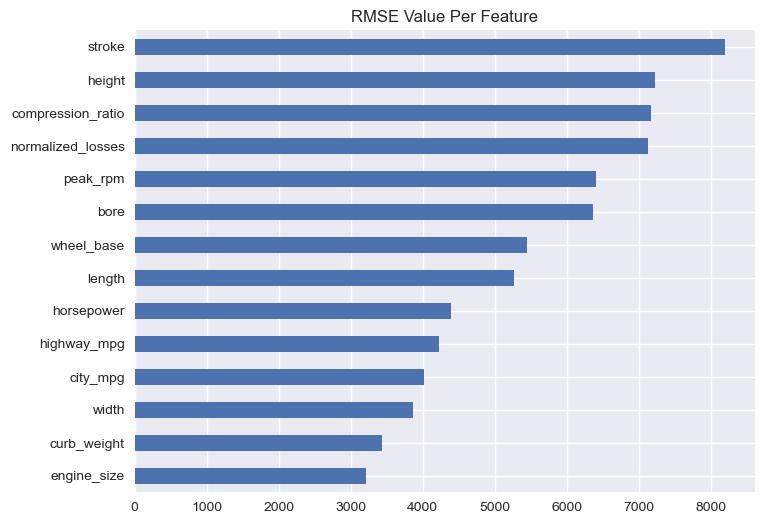

In [15]:
uni_rmse.sort_values().plot.barh(figsize=(8, 6)) # horizontal bar plot of uni_rmse Series
plt.title('RMSE Value Per Feature')
plt.show()

After computing the RMSE value for each of the individual features, we can see that the top 5 features were the:
1. engine_size
2. curb_weight
3. highway_mpg
4. width
5. city_mpg

## Hyperparameter Optimisation
We are going to vary the k value of our model between 1 and 9 and see how it performs at each k value. We will compute the average RMSE values of each of the features for each of the k values.

In [16]:
def knn_train_test(cols, col2, df, k=5):
    """ Predict a variable and calculate RMSE value.
    
     This function takes in a list of columns to train, the target column to predict, and a DataFrame, 
     randomizes the index and then uses the `scikit-learn.neighbors KNeighborRegressor` class
     to predict a variable and also uses `scikit-learn.metrics.mean_square_error`
     to calculate the RMSE value by taking the squareroot of the mean square error.
    
    Parameters
    ----------
    cols : list
         list of columns in DataFrame to train.
    col2 : str
         name of target column in DataFrame.
    df : DataFrame
    n : int, default 5
       number of n_neighbors.
    
    Returns
    -------
    predictions : numpy.ndarray
               numpy array with the predicted values of target column.
    rmse : float
         squareroot of mean_squared_error.
    """
    np.random.seed(1) # random seed set to one so shuffling can be recreated
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    split_index = int(df.shape[0] / 2) # split the DataFrame index in 2
    train_df = rand_df.iloc[:split_index]
    test_df = rand_df.iloc[split_index:]
    
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(train_df[cols], train_df[col2])
    predictions = model.predict(test_df[cols])
    mse = mean_squared_error(test_df[col2], predictions)
    rmse = np.sqrt(mse)
    
    return rmse, predictions

In [17]:
n_neighbors = [1, 3, 5, 7, 9]
rmse_values = dict()

for col in all_features:
    values_dict = {}
    for k in n_neighbors:
        rmse, predictions = knn_train_test([col], 'price', num_cars, k)
        values_dict[k] = rmse
        
    rmse_values[col] = values_dict
    
    
rmse_values
        

{'normalized_losses': {1: 6694.570468670861,
  3: 6826.3298816665265,
  5: 7135.55826813852,
  7: 7200.615872965312,
  9: 7558.369506353068},
 'wheel_base': {1: 4620.2792253282705,
  3: 5276.875633996567,
  5: 5443.4706133127975,
  7: 5470.900756693712,
  9: 5504.797353128664},
 'length': {1: 6448.552807413459,
  3: 6162.721575822739,
  5: 5267.597971751451,
  7: 4981.544741383757,
  9: 4899.461581668635},
 'width': {1: 3901.0089656395303,
  3: 3525.0757924081886,
  5: 3859.1580203977137,
  7: 3556.6762572057955,
  9: 3572.711844551353},
 'height': {1: 11431.940340117246,
  3: 7499.169464013998,
  5: 7224.451060696585,
  7: 7224.195353286689,
  9: 7189.266122044743},
 'curb_weight': {1: 4449.993086511484,
  3: 3682.620615208082,
  5: 3440.084766630032,
  7: 3173.305221110401,
  9: 3373.116826110918},
 'engine_size': {1: 3320.5385180720314,
  3: 3043.932418946109,
  5: 3210.6492785727937,
  7: 3048.2077737649083,
  9: 3144.989176726749},
 'bore': {1: 6220.38641806118,
  3: 5852.88429494

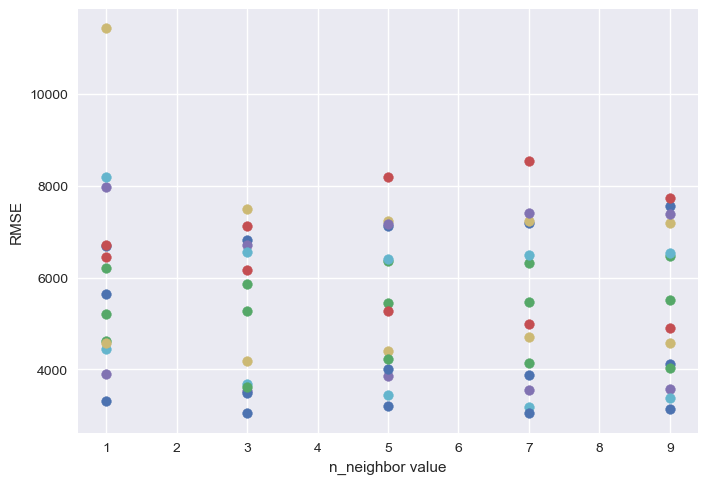

In [18]:
for k,v in rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
 # displays a scatter plot of the rmse values of the different features for n number of neighbors 
    plt.scatter(x,y)
    plt.xlabel('n_neighbor value')
    plt.ylabel('RMSE')

There is no clear pattern to how the model behaves as we vary the values for k. For most features the RMSE values decreased as we varied k from 1 - 3, while in some features the RMSE increased as we varied k from 1 - 3.

In [19]:
feature_avg_rmse = {}
for k,v in rmse_values.items():
    avg_rmse = np.mean(list(v.values())) # computes the mean for the list of values in feature_avg_rmse
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse) # converts feature_avg_rmse dict to a pandas Series
sorted_series_avg_rmse = series_avg_rmse.sort_values() # sorts values in Series in ascending order
sorted_series_avg_rmse

engine_size          3153.663433
curb_weight          3623.824103
width                3682.926176
city_mpg             4229.233917
highway_mpg          4246.197524
horsepower           4485.713868
wheel_base           5263.264716
length               5551.975736
bore                 6245.934271
peak_rpm             6837.552589
normalized_losses    7083.088800
compression_ratio    7335.174631
stroke               7661.692586
height               8113.804468
dtype: float64

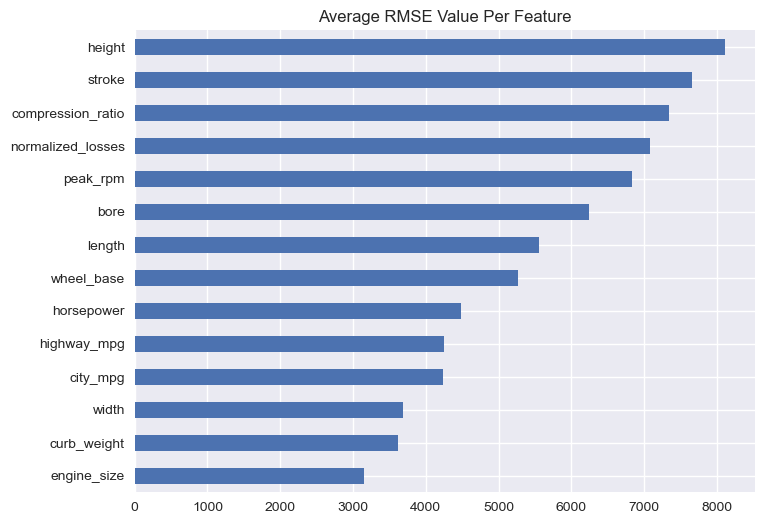

In [20]:
sorted_series_avg_rmse.plot.barh(figsize=(8, 6)) # horizontal bar plot of sorted_Series_avg_rmse
plt.title('Average RMSE Value Per Feature')
plt.show()

After taking the average RMSES for each feature for the different k value, there is not so much change to the top 5 performing features. Just a slight difference in how it was ordered. The top 5 features are:
1. engine_size
2. curb_weight          
3. city_mpg             
4. highway_mpg          
5. width     

## Multivariate Model Testing
In our previous testing we used just one feature. Here we are going to use multiple features from the 5 best performing features in the last test. We are going to see how the model performs when we train it with the 2 best features up to the 5 best features.

In [21]:
best_features = list(sorted_series_avg_rmse.index)
best_rmse = {}

for i in range(2, 6):
    rmse, predictions = knn_train_test(best_features[:i], 'price', num_cars)
    best_rmse[f'best {i} features'] = rmse
    
    
best_rmse   

{'best 2 features': 2778.813779367016,
 'best 3 features': 2782.121585553011,
 'best 4 features': 2740.260301577206,
 'best 5 features': 2661.707272259667}

The model performed best when we used the  best 2 features, best 3 features and best 5 features. In fact we got the lowest RMSE score when we used the best 5 features.

## Multivariate Hyperparameter Optimisation
We are going to vary the k value between 1 - 25 for the 2 best , 3 best and 5 best features.

In [22]:
top3_features = [2, 3, 5]
top3_rmse = {}


for i in top3_features:
    top_rmse = {}
    for k in range(1, 26):
        rmse, predictions = knn_train_test(best_features[:i], 'price',
                                           num_cars, k)
        top_rmse[k] = rmse
    top3_rmse[f'best {i} features'] = top_rmse
    
top3_rmse
        

{'best 2 features': {1: 3405.0011057266925,
  2: 2806.815926009399,
  3: 2825.706490419697,
  4: 2755.885691343166,
  5: 2778.813779367016,
  6: 2846.9636251725374,
  7: 2939.963979267051,
  8: 3089.8980241819877,
  9: 3287.39623079902,
  10: 3427.6364073366944,
  11: 3585.7816664807447,
  12: 3635.585689432768,
  13: 3663.6037412497835,
  14: 3664.5333259279732,
  15: 3681.502867863733,
  16: 3707.625229104499,
  17: 3741.403109288515,
  18: 3711.0384404436736,
  19: 3747.9428945198347,
  20: 3734.082117780085,
  21: 3718.063204313483,
  22: 3757.7638630375964,
  23: 3768.966847784356,
  24: 3805.2092223468253,
  25: 3838.159680749096},
 'best 3 features': {1: 2557.6039431467884,
  2: 2569.8048286786293,
  3: 2680.4457981213995,
  4: 2706.3757032006847,
  5: 2782.121585553011,
  6: 2802.973499399046,
  7: 2668.6396404558345,
  8: 2794.880771411591,
  9: 2858.5300872569255,
  10: 2992.096826324309,
  11: 3124.7371197198927,
  12: 3220.5144550103414,
  13: 3315.469371208263,
  14: 3457.

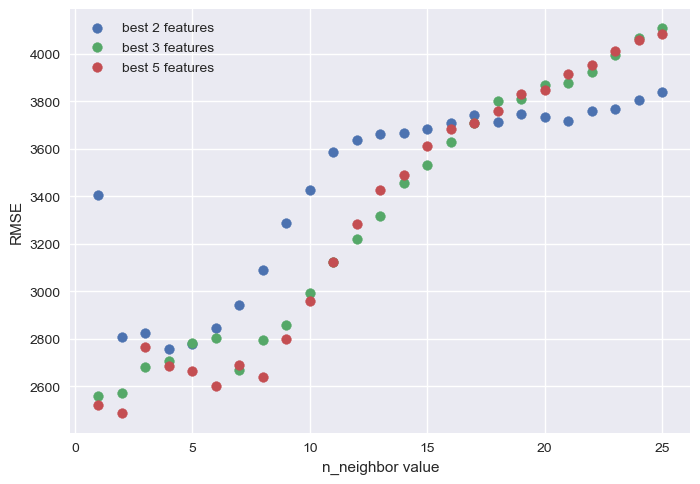

In [23]:
for k,v in top3_rmse.items(): # scatter plot for each of the rmse values and n_neighbor values of the top 3 performing multi features
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y, label=f'{k}')
    plt.xlabel('n_neighbor value')
    plt.ylabel('RMSE')
    plt.legend()

The RMSE values dropped as the n_neighbor value varied from 1 - 2 and then alternated a little bit before climbing steadily as the value for the n_neighbor increased.

## Cross Validation
Cross validation is important as it prevents your model from overfitting. We have chosen to work with a maximum of 6 folds so that that sample from each fold is representative enough as there are not a lot of rows in our dataset.

In [24]:
def crossval_train_test(cols, col2, df, n=2):
    """ Calculates average rmse and std rmse value for n number of folds.
    
    This function takes in a list of columns to train, the target column to predict, and a DataFrame
    The DataFrame is split and randomized using `scikit-learn.model_selection` KFold class while the
    average rmse and std rmse values are calculated by taking the mean and std of the squareroot of 
    mean_squared_error values returned by `scikit-learn.model_selction` cross_val_score class.
    
    Parameters
    ----------
    cols : list
         list of columns in DataFrame to train.
    col2 : str
         name of target column in DataFrame.
    df : DataFrame
    n : int, default 2
       number of splits.
    
    Returns
    -------
    avg_rmse : float
               average rmse value.
    std_rmse : float
         standard deviation of rmse values.
    """
    kf = KFold(n, shuffle=True, random_state = 1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, df[cols],
                         df[col2], scoring = 'neg_mean_squared_error',
                         cv = kf)
    rmses = np.sqrt(abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    
    return avg_rmse, std_rmse

In [25]:
five_features = {}
for i in range(2,7):
    avg_rmse, std_rmse = crossval_train_test(best_features[:5], 'price',
                                             num_cars, i)
    five_features[f'{i} folds'] = (avg_rmse, std_rmse)
    
five_features

{'2 folds': (3562.6133818725725, 902.4692498376185),
 '3 folds': (3450.090520443678, 843.9558467007453),
 '4 folds': (3221.779687189057, 739.6178061782875),
 '5 folds': (3108.6109855711557, 1248.9847308059154),
 '6 folds': (3012.91546763917, 1294.131338358378)}

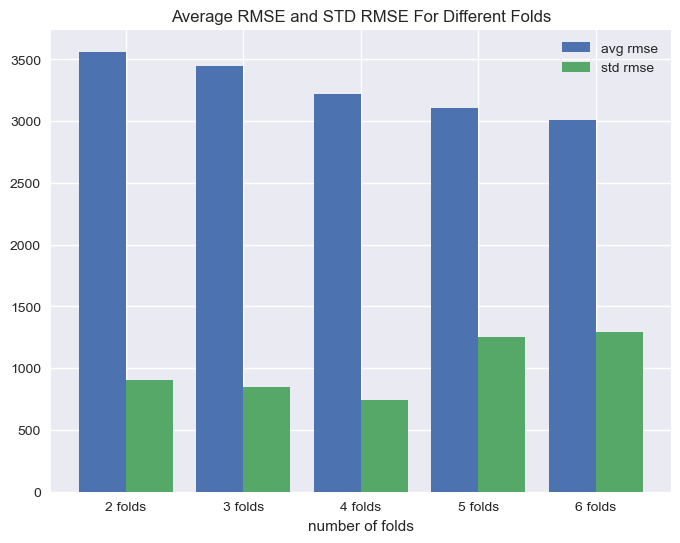

In [26]:
averages = []
stds = []
for k,v in five_features.items():
    avg = v[0]
    std = v[1]
    averages.append(avg)
    stds.append(std)
    
plt.figure(figsize=(8, 6))
x = np.arange(5)
width = 0.4
plt.xticks(x, ['2 folds', '3 folds', '4 folds', '5 folds', '6 folds'])
bar1 = plt.bar(x - width/2, averages, 
               label='avg rmse', width = width
              )
bar2 = plt.bar(x + width/2, stds, 
               label='std rmse', width = width
              )

plt.xlabel('number of folds')
plt.legend()
plt.title('Average RMSE and STD RMSE For Different Folds')
plt.show()

The average RMSE values and the standard deviation of the RMSE values reduced as we varied the number of folds from 2 to 4. And when we varied from 4 folds up to 6 folds, the average RMSE values reduced still but the standard deviation of the RMSE values increased. Optimally we want a low bias(average RMSE value) as well as a low variance(standard deviation of RMSE) but there is usually a trade off between the bias and the variance. 

## Conclusion
We can learn the following from this project:

* Increasing the number of K neighbours doesn't necessarily mean an increase in the model's performance.
* Increasing the number of features doesn't also mean that the model will perform better. This is why hperparameter optimistions as well as feature selecion is very important.
* When we used KFold for our cross validation, we saw that as the bias decreased, the variance increased.